In [15]:
import mne
import matplotlib.pyplot as plt
import os
import numpy as np
import sys
sys.path.append('../utils')
from ERP_utils import *

In [16]:
period = 'post'
subject = '01'

eps_dir = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05_30Hz'
epochs = mne.read_epochs(os.path.join(eps_dir, f'listen_epochs_{period}_{subject}.fif'))

erp_times = create_erp_times(-0.5, 0.5, 128)

Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05_30Hz/listen_epochs_post_01.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated


/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_57812/2188132401.py:5: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05_30Hz/listen_epochs_post_01.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(os.path.join(eps_dir, f'listen_epochs_{period}_{subject}.fif'))


Text(0.5, 0, 'time (s)')

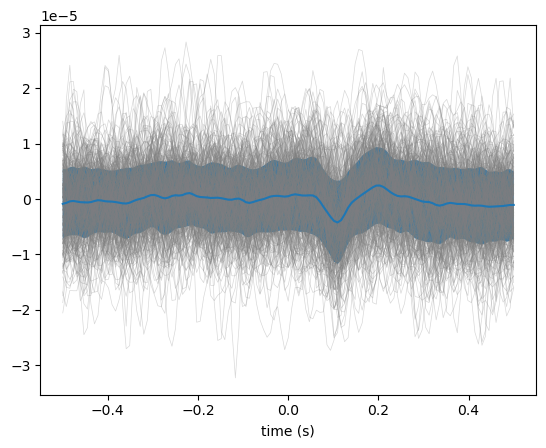

In [29]:
ch = 47

eps_data = epochs.get_data()
for trial in range(eps_data.shape[0]):
    ep_trial = eps_data[trial, ch, :]
    plt.plot(erp_times, ep_trial, color = 'grey', linewidth = 0.5, alpha = 0.3)

erp_mean = np.mean(eps_data, axis = 0).squeeze()
erp_std = np.std(eps_data, axis = 0)


plt.plot(erp_times, erp_mean[ch, :])
plt.fill_between(erp_times, erp_mean[ch, :]-erp_std[ch, :], erp_mean[ch, :] + erp_std[ch, :])

plt.xlabel('time (s)')


In [26]:
erp_mean.shape

(72, 129)